In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('alucar.csv')

In [3]:
alucar.sample(5)

,mes,vendas
13,2018-02-28,293
12,2018-01-31,261
17,2018-06-30,440
0,2017-01-31,10
23,2018-12-31,721


In [4]:
print(f"Quantidade de linhas e colunas: {alucar.shape}")

Quantidade de linhas e colunas: (24, 2)


In [6]:
print(f"Quantidade de dados nulos: {alucar.isna().sum().sum()}")

Quantidade de dados nulos: 0


In [8]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [10]:
import seaborn as sns

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

In [12]:
print(sns.__version__)

0.11.2


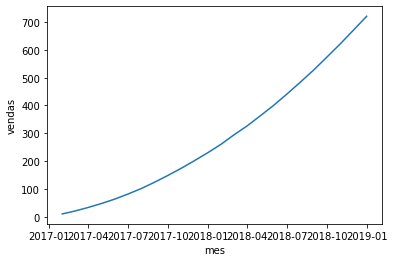

In [13]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

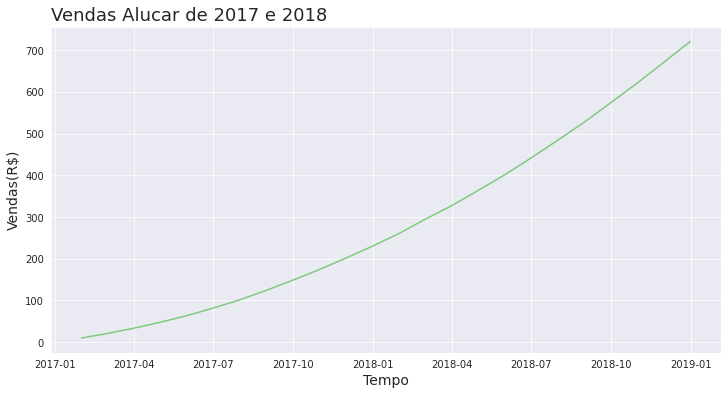

In [21]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax = ax.set_ylabel('Vendas(R$)', fontsize = 14)